In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
from pprint import pprint
import numpy as np
import json
import censusgeocode as cg
import matplotlib.pyplot as plt


In [2]:
la_restaurants=pd.read_csv("LA_County_Resturants_CensusTracts.csv")
census_tract= pd.read_csv('2015_census_tract_data.csv')
la_census_tract=census_tract.loc[census_tract["County"]=="Los Angeles",:]
pov_edu = pd.read_csv('census_data.csv')

In [3]:
df_2015_census = pd.merge(la_restaurants, la_census_tract, how='left', on='CensusTract')
df_2015_census.to_csv('kaggle_census.csv')

pov_df=pd.merge(pov_edu,la_census_tract,how='left', on='CensusTract')
pov_df.to_csv('kaggle merged with pov.csv')

In [4]:
#df.count()

In [5]:
df_2015_census.head()
clean_df=df_2015_census[['CensusTract','name','category1','price','rating','review_count','city','zipcode',
             'Hispanic','White','Black','Native','Asian','Pacific',
            'Income','IncomePerCap', 'Poverty','County']]

In [6]:
clean_df.head()
clean_census_file=clean_df.dropna(how="any")

In [7]:
clean_census_file.count()

CensusTract     1736
name            1736
category1       1736
price           1736
rating          1736
review_count    1736
city            1736
zipcode         1736
Hispanic        1736
White           1736
Black           1736
Native          1736
Asian           1736
Pacific         1736
Income          1736
IncomePerCap    1736
Poverty         1736
County          1736
dtype: int64

In [8]:
clean_census_file.head()
clean_census_file.to_csv('kaggle_restaurant_merge.csv')

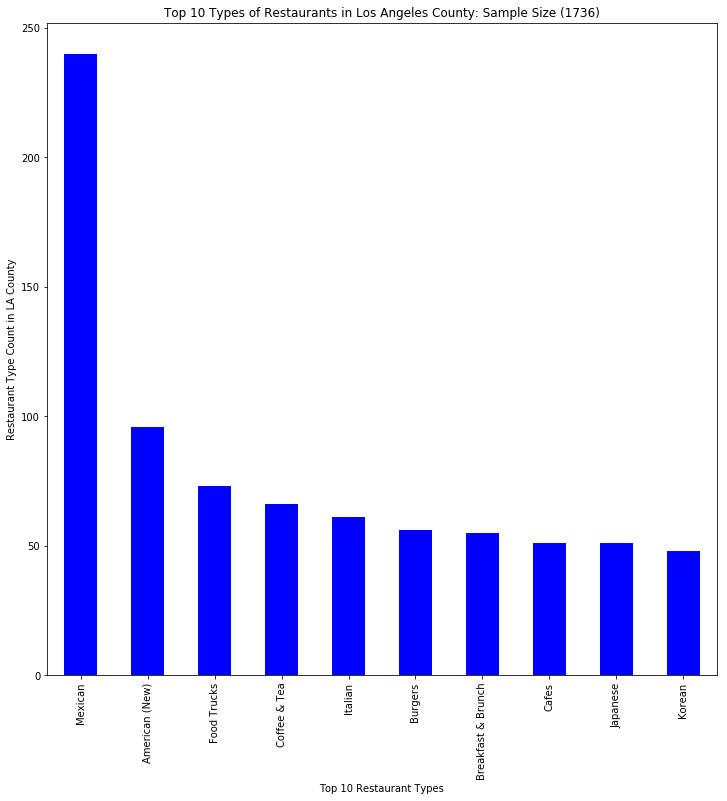

In [28]:
la_df=clean_census_file.groupby("category1")
# la_df.head()
la=la_df["County"].count()
la=la.sort_values(ascending=False)
# la=la/la.sum()
la=pd.DataFrame(la)
la=la.iloc[0:10]

chart_food_type=la["County"].plot(kind='bar',figsize=(12,12),color='blue')

chart_food_type.set_xlabel("Top 10 Restaurant Types")
chart_food_type.set_ylabel("Restaurant Type Count in LA County") 
chart_food_type.set_title(f"Top 10 Types of Restaurants in Los Angeles County: Sample Size ({clean_census_file['category1'].count()})")
plt.show()
plt.savefig("Top10typesLA.png")